In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', None)

# PREPROCESSING DATA

In [2]:
data = pd.read_csv('dataraw.csv')
data.shape

(3920, 7)

In [3]:
df = pd.DataFrame(data[['comment']])
df.head(3)

,comment
0,AI yang buat programmer buat mempermudah pekerjaan ❤
1,Kan banyak AI bayak harus di coding jadi harus di coding sama manusia
2,"saya yang jurusannya komputer juga merasa AI seperti chatgpt itu membantu banget, kalo misal mesti bikin tugas program dalam C, java, ataupun C++"


In [4]:
df.drop_duplicates(subset='comment', keep='first', inplace=True)
df.shape

(3897, 1)

# Cleaning Process

In [5]:
import re

def clean_text(text):
  # Ganti tag HTML (seperti <br>) dengan spasi
  text = re.sub(r'<.*?>', ' ', text)
  # Menghapus URL atau tautan
  text = re.sub(r'https?://\S+|www\.\S+', '', text)
  # Menghapus tag @ (misalnya @username)
  text = re.sub(r'@\S+', '', text)
  # Menghapus karakter selain huruf dan spasi
  text = re.sub(r'[^a-zA-Z\s]', ' ', text)
  # Menghilangkan spasi berlebih
  text = re.sub(r'\s+', ' ', text).strip()
  return text

# Menerapkan fungsi pembersihan ke kolom 'cleaned_comment'
df['cleaning'] = df['comment'].apply(clean_text)

In [6]:
df.head(2)

,comment,cleaning
0,AI yang buat programmer buat mempermudah pekerjaan ❤,AI yang buat programmer buat mempermudah pekerjaan
1,Kan banyak AI bayak harus di coding jadi harus di coding sama manusia,Kan banyak AI bayak harus di coding jadi harus di coding sama manusia


# Case Folding Process

In [7]:
def case_folding(text):
  if isinstance(text, str):
    lowercase_text = text.lower()
    return lowercase_text
  else:
    return text

df['cleaning'] = df['cleaning'].apply(case_folding)

# Normalisasi

In [8]:
import requests
from io import BytesIO

def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

In [9]:
data = pd.DataFrame(df[['comment', 'cleaning']])    # pengubahan variable df menjadi data

In [13]:
file_path = 'kamuskatabaku.xlsx'
kamus_data = pd.read_excel(file_path)

kamus_tidak_baku_dict = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

print(kamus_tidak_baku_dict)

{'woww': 'wow', 'aminn': 'amin', 'met': 'selamat', 'netaas': 'menetas', 'keberpa': 'keberapa', 'eeeehhhh': 'eh', 'kata2nyaaa': 'kata-katanya', 'hallo': 'halo', 'kaka': 'kakak', 'ka': 'kak', 'daah': 'dah', 'aaaaahhhh': 'ah', 'yaa': 'ya', 'smga': 'semoga', 'slalu': 'selalu', 'amiin': 'amin', 'kk': 'kakak', 'trus': 'terus', 'sii': 'sih', 'nyenengin': 'menyenangkan', 'bgt': 'banget', 'gemess': 'gemas', 'akuuu': 'aku', 'jgn': 'jangan', 'udah': 'sudah', 'gitu': 'begitu', 'aja': 'saja', 'gemesiin': 'menggemaskan', 'menyenangkn': 'menyenangkan', 'rb': 'ribu', 'akau': 'aku', 'saranin': 'menyarankan', 'nemuin': 'menemukan', 'yah': 'ya', 'mnis2nya': 'manis-manisnya', 'gtu': 'begitu', 'tu': 'itu', 'idolaa': 'idola', 'bangett': 'banget', 'kaakk': 'kak', 'baaiikkk': 'baik', 'telaatt': 'telat', 'kaak': 'kak', 'yg': 'yang', 'lg': 'lagi', 'skarang': 'sekarang', 'sempet': 'sempat', 'karna': 'karena', 'ngga': 'tidak', 'mantep': 'mantap', 'loohhh': 'loh', 'yeee': 'ya', 'baguuuuus': 'bagus', 'sampe': 'samp

In [14]:
data[['normalisasi', 'kata_baku', 'kata_tidak_baku', 'kata_tidak_baku_hash']] = data['cleaning'].apply(
    lambda x: pd.Series(replace_taboo_words(x, kamus_tidak_baku_dict)))

In [15]:
df = pd.DataFrame(data[['comment', 'cleaning', 'normalisasi']])
df.head(4)

,comment,cleaning,normalisasi
0,AI yang buat programmer buat mempermudah pekerjaan ❤,ai yang buat programmer buat mempermudah pekerjaan,artificialintelligence yang buat programmer buat mempermudah pekerjaan
1,Kan banyak AI bayak harus di coding jadi harus di coding sama manusia,kan banyak ai bayak harus di coding jadi harus di coding sama manusia,kan banyak artificialintelligence bayak harus di coding jadi harus di coding sama manusia
2,"saya yang jurusannya komputer juga merasa AI seperti chatgpt itu membantu banget, kalo misal mesti bikin tugas program dalam C, java, ataupun C++",saya yang jurusannya komputer juga merasa ai seperti chatgpt itu membantu banget kalo misal mesti bikin tugas program dalam c java ataupun c,saya yang jurusannya komputer juga merasa artificialintelligence seperti chatgpt itu membantu banget kalau misal mesti bikin tugas program dalam sih java ataupun sih
3,"ga akan pernah gantikan manusia. <br>manusia biadab, AI tidak. <br>kwkwkwkkw<br>canda..",ga akan pernah gantikan manusia manusia biadab ai tidak kwkwkwkkw canda,tidak akan pernah gantikan manusia manusia biadab artificialintelligence tidak kwkwkwkkw canda


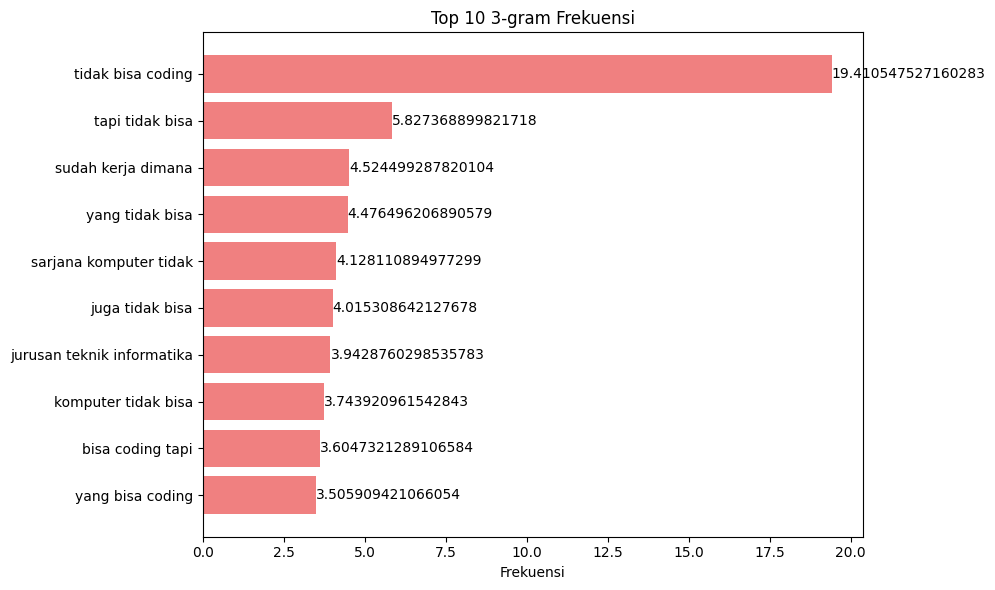

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

# Fungsi untuk membuat diagram batang frekuensi n-gram
def plot_ngram_frequencies(texts, ngram_range=(3, 3), top_n=10, color='skyblue'):
    vectorizer = TfidfVectorizer(ngram_range=ngram_range)
    X = vectorizer.fit_transform(texts)

    # Hitung total frekuensi setiap n-gram
    ngram_counts = X.sum(axis=0).A1
    ngram_vocab = vectorizer.get_feature_names_out()
    freq_dist = dict(zip(ngram_vocab, ngram_counts))

    # Ambil n-gram dengan frekuensi tertinggi
    top_ngrams = Counter(freq_dist).most_common(top_n)
    labels, values = zip(*top_ngrams)

    # Visualisasi
    plt.figure(figsize=(10, 6))
    bars = plt.barh(labels[::-1], values[::-1], color=color)
    plt.title(f'Top {top_n} {ngram_range[0]}-gram Frekuensi')
    plt.xlabel('Frekuensi')

    # add labels at the end of each bar
    for bar in bars:
      width = bar.get_width()
      plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center')

    plt.tight_layout()
    plt.show()
# visualisasi 3-gram
plot_ngram_frequencies(df['normalisasi'], ngram_range=(3, 3), top_n=10, color='lightcoral')

# Tokenization

In [17]:
def tokenize(text):
  tokens = text.split()
  return tokens

df['tokenize'] = df['normalisasi'].apply(tokenize)

In [18]:
df.head()

,comment,cleaning,normalisasi,tokenize
0,AI yang buat programmer buat mempermudah pekerjaan ❤,ai yang buat programmer buat mempermudah pekerjaan,artificialintelligence yang buat programmer buat mempermudah pekerjaan,"[artificialintelligence, yang, buat, programmer, buat, mempermudah, pekerjaan]"
1,Kan banyak AI bayak harus di coding jadi harus di coding sama manusia,kan banyak ai bayak harus di coding jadi harus di coding sama manusia,kan banyak artificialintelligence bayak harus di coding jadi harus di coding sama manusia,"[kan, banyak, artificialintelligence, bayak, harus, di, coding, jadi, harus, di, coding, sama, manusia]"
2,"saya yang jurusannya komputer juga merasa AI seperti chatgpt itu membantu banget, kalo misal mesti bikin tugas program dalam C, java, ataupun C++",saya yang jurusannya komputer juga merasa ai seperti chatgpt itu membantu banget kalo misal mesti bikin tugas program dalam c java ataupun c,saya yang jurusannya komputer juga merasa artificialintelligence seperti chatgpt itu membantu banget kalau misal mesti bikin tugas program dalam sih java ataupun sih,"[saya, yang, jurusannya, komputer, juga, merasa, artificialintelligence, seperti, chatgpt, itu, membantu, banget, kalau, misal, mesti, bikin, tugas, program, dalam, sih, java, ataupun, sih]"
3,"ga akan pernah gantikan manusia. <br>manusia biadab, AI tidak. <br>kwkwkwkkw<br>canda..",ga akan pernah gantikan manusia manusia biadab ai tidak kwkwkwkkw canda,tidak akan pernah gantikan manusia manusia biadab artificialintelligence tidak kwkwkwkkw canda,"[tidak, akan, pernah, gantikan, manusia, manusia, biadab, artificialintelligence, tidak, kwkwkwkkw, canda]"
4,yang penting belajar,yang penting belajar,yang penting belajar,"[yang, penting, belajar]"


In [19]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hardi_Siswanto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

df['stopword'] = df['tokenize'].apply(lambda x: ' '.join(remove_stopwords(x)))

In [21]:
df.head(5)

,comment,cleaning,normalisasi,tokenize,stopword
0,AI yang buat programmer buat mempermudah pekerjaan ❤,ai yang buat programmer buat mempermudah pekerjaan,artificialintelligence yang buat programmer buat mempermudah pekerjaan,"[artificialintelligence, yang, buat, programmer, buat, mempermudah, pekerjaan]",artificialintelligence programmer mempermudah pekerjaan
1,Kan banyak AI bayak harus di coding jadi harus di coding sama manusia,kan banyak ai bayak harus di coding jadi harus di coding sama manusia,kan banyak artificialintelligence bayak harus di coding jadi harus di coding sama manusia,"[kan, banyak, artificialintelligence, bayak, harus, di, coding, jadi, harus, di, coding, sama, manusia]",artificialintelligence bayak coding coding manusia
2,"saya yang jurusannya komputer juga merasa AI seperti chatgpt itu membantu banget, kalo misal mesti bikin tugas program dalam C, java, ataupun C++",saya yang jurusannya komputer juga merasa ai seperti chatgpt itu membantu banget kalo misal mesti bikin tugas program dalam c java ataupun c,saya yang jurusannya komputer juga merasa artificialintelligence seperti chatgpt itu membantu banget kalau misal mesti bikin tugas program dalam sih java ataupun sih,"[saya, yang, jurusannya, komputer, juga, merasa, artificialintelligence, seperti, chatgpt, itu, membantu, banget, kalau, misal, mesti, bikin, tugas, program, dalam, sih, java, ataupun, sih]",jurusannya komputer artificialintelligence chatgpt membantu banget mesti bikin tugas program sih java sih
3,"ga akan pernah gantikan manusia. <br>manusia biadab, AI tidak. <br>kwkwkwkkw<br>canda..",ga akan pernah gantikan manusia manusia biadab ai tidak kwkwkwkkw canda,tidak akan pernah gantikan manusia manusia biadab artificialintelligence tidak kwkwkwkkw canda,"[tidak, akan, pernah, gantikan, manusia, manusia, biadab, artificialintelligence, tidak, kwkwkwkkw, canda]",gantikan manusia manusia biadab artificialintelligence kwkwkwkkw canda
4,yang penting belajar,yang penting belajar,yang penting belajar,"[yang, penting, belajar]",belajar


c:\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['rt'] not in stop_words.
  warnings.warn(


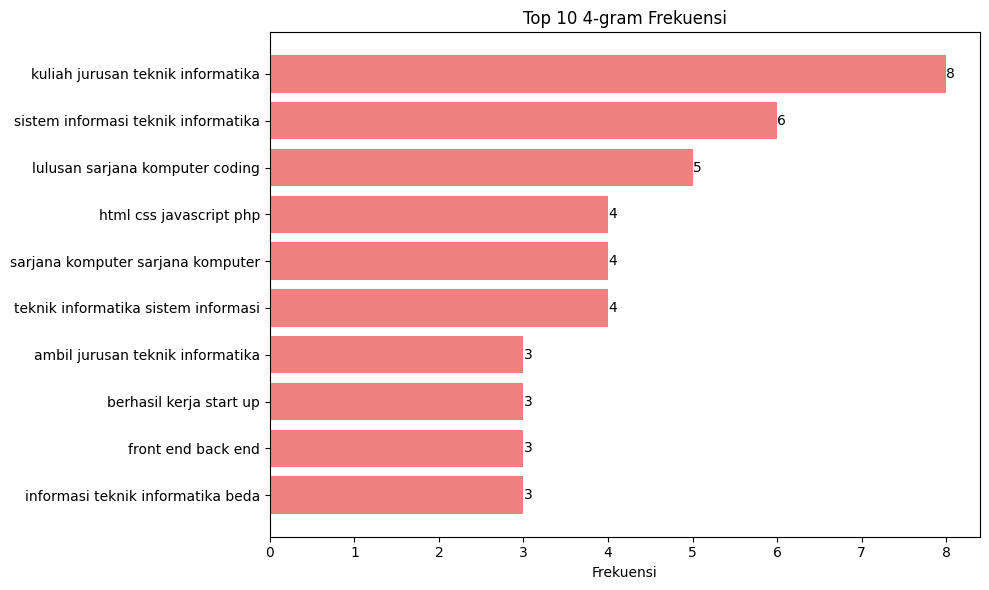

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

# Daftar stopwords tambahan
custom_stopwords = ['https', 'co', 'RT', '...', 'amp', 'lu', 'deh', 'fyp', 'ya', 'gue', 'cs', 'kayak', 'nih', 'termui',
                    'sih', 'yg', 'nya', 'aja', 'sdh', 'gak', 'ga', 'update', 'apk', 'ajar', 'si', 'ok', 'gas', 'omon', 'nyinyir',]

# Fungsi untuk membuat diagram batang frekuensi n-gram
def plot_ngram_frequencies(texts, ngram_range=(3, 3), top_n=15, color='skyblue'):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words=custom_stopwords)
    X = vectorizer.fit_transform(texts)

    # Hitung total frekuensi setiap n-gram
    ngram_counts = X.sum(axis=0).A1
    ngram_vocab = vectorizer.get_feature_names_out()
    freq_dist = dict(zip(ngram_vocab, ngram_counts))

    # Ambil n-gram dengan frekuensi tertinggi
    top_ngrams = Counter(freq_dist).most_common(top_n)
    labels, values = zip(*top_ngrams)

    # Visualisasi
    plt.figure(figsize=(10, 6))
    bars = plt.barh(labels[::-1], values[::-1], color=color)
    plt.title(f'Top {top_n} {ngram_range[0]}-gram Frekuensi')
    plt.xlabel('Frekuensi')

    # add labels at the end of each bar
    for bar in bars:
      width = bar.get_width()
      plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center')

    plt.tight_layout()
    plt.show()
# visualisasi 3-gram
plot_ngram_frequencies(df['stopword'], ngram_range=(4, 4), top_n=10, color='lightcoral')

# Proses Hapus Data Bernilai Kosong (NaN)

In [24]:
# ubah dataframe dari df -> data

data = df.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3897 entries, 0 to 3919
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   comment      3897 non-null   object
 1   cleaning     3897 non-null   object
 2   normalisasi  3897 non-null   object
 3   tokenize     3897 non-null   object
 4   stopword     3897 non-null   object
dtypes: object(5)
memory usage: 182.7+ KB


# WordCloud setelah Preprocessing

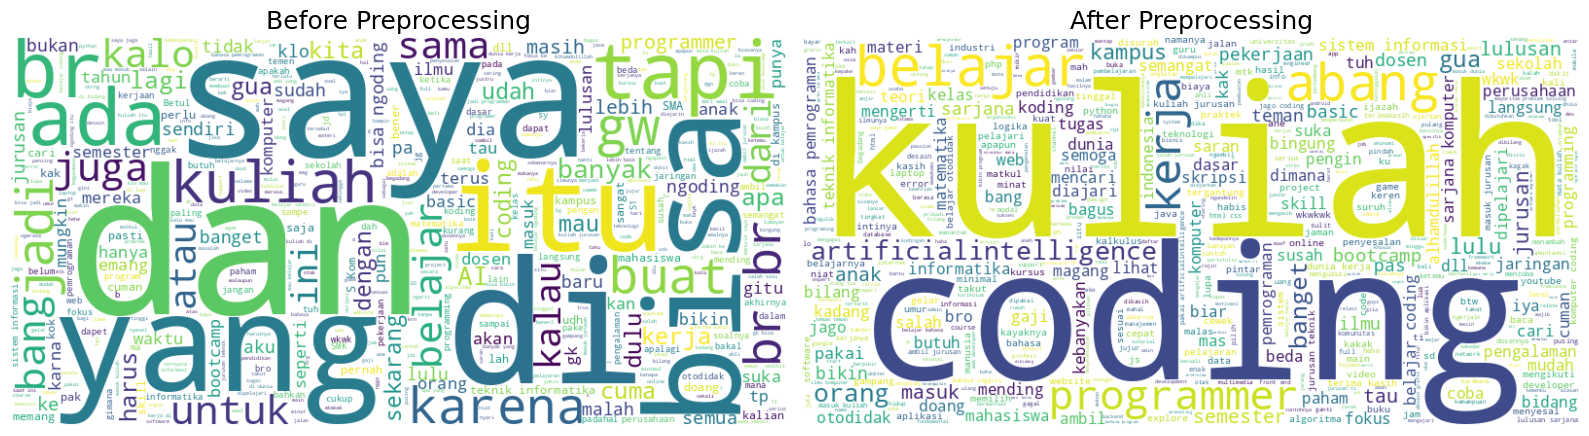

In [25]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Buat stopwords tambahan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'lu', 'deh', 'fyp', 'ya', 'gue', 'cs', 'kayak', 'nih', 'termui',
                    'sih', 'yg', 'nya', 'aja', 'sdh', 'gak', 'ga', 'update', 'apk', 'ajar', 'si', 'ok', 'gas', 'omon', 'nyinyir',])

# WordCloud Before (dari kolom 'Review Text')
text_before = ' '.join( data['comment'].astype(str).tolist())

wc_before = WordCloud(
    stopwords=stopwords,
    background_color="white",
    max_words=500,
    width=800,
    height=400
).generate(text_before)

# WordCloud After (dari kolom 'stopword removal')
text_after = ' '.join(
    [" ".join(eval(x) if isinstance(x, str) and x.startswith('[') else x.split())
    for x in data['stopword'].astype(str)]
)

wc_after = WordCloud(
    stopwords=stopwords,
    background_color="white",
    max_words=500,
    width=800,
    height=400
).generate(text_after)

# Visualisasi side-by-side
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wc_before, interpolation='bilinear')
plt.axis("off")
plt.title("Before Preprocessing", fontsize=18)

plt.subplot(1, 2, 2)
plt.imshow(wc_after, interpolation='bilinear')
plt.axis("off")
plt.title("After Preprocessing", fontsize=18)

plt.tight_layout()
plt.show()


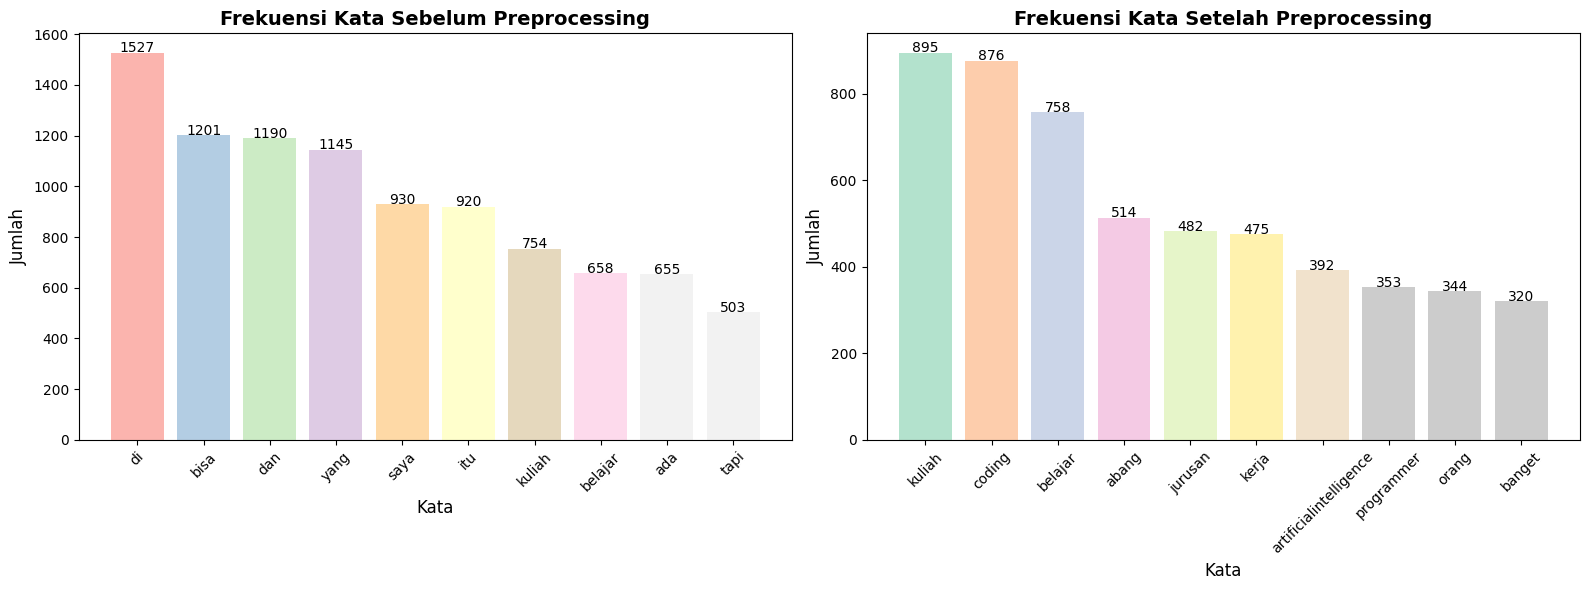

In [26]:
from collections import Counter
from wordcloud import  STOPWORDS

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'lu', 'deh', 'fyp', 'ya', 'gue', 'cs', 'kayak', 'nih', 'termui',
                    'sih', 'yg', 'nya', 'aja', 'sdh', 'gak', 'ga', 'update', 'apk', 'ajar', 'si', 'ok', 'gas', 'omon', 'nyinyir',])

# Fungsi helper untuk membersihkan tanda kutip, [], dll
def clean_text_column(series):
    cleaned = []
    for text in series.astype(str):
        # Hapus [], tanda petik tunggal/ganda, koma
        text = re.sub(r"\[|\]|'|\"|,", "", text)
        cleaned.append(text.strip())
    return " ".join(cleaned)

# BEFORE: Kolom 'Review Text'
all_text_before = clean_text_column(data["comment"])
words_before = all_text_before.split()
filtered_words_before = [word for word in words_before if word.lower() not in stopwords]
word_counts_before = Counter(filtered_words_before)
top_words_before = word_counts_before.most_common(10)
word_before, count_before = zip(*top_words_before)

# AFTER: kolom 'stopword removal'
all_text_after = clean_text_column(data["stopword"])
words_after = all_text_after.split()
filtered_words_after = [word for word in words_after if word.lower() not in stopwords]
word_counts_after = Counter(filtered_words_after)
top_words_after = word_counts_after.most_common(10)
word_after, count_after = zip(*top_words_after)

# Plot berdampingan
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# BEFORE Plot
colors_before = plt.cm.Pastel1(range(len(word_before)))
bars1 = axes[0].bar(word_before, count_before, color=colors_before)
axes[0].set_title("Frekuensi Kata Sebelum Preprocessing", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Kata", fontsize=12)
axes[0].set_ylabel("Jumlah", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
for bar, count in zip(bars1, count_before):
    axes[0].text(bar.get_x() + bar.get_width()/2, count + 1, str(count), ha='center')

# AFTER Plot
colors_after = plt.cm.Pastel2(range(len(word_after)))
bars2 = axes[1].bar(word_after, count_after, color=colors_after)
axes[1].set_title("Frekuensi Kata Setelah Preprocessing", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Kata", fontsize=12)
axes[1].set_ylabel("Jumlah", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
for bar, count in zip(bars2, count_after):
    axes[1].text(bar.get_x() + bar.get_width()/2, count + 1, str(count), ha='center')

plt.tight_layout()
plt.show()


# Simpan file hasil_preprocessing

In [35]:
df.to_csv('hasil_preprocessing.csv', encoding='utf8', index=False)

# Label Data siRendy indobert analysis

In [2]:
df = pd.read_csv('hasil_preprocessing.csv')
df.head(3)

,comment,cleaning,normalisasi,tokenize,stopword
0,AI yang buat programmer buat mempermudah pekerjaan ❤,ai yang buat programmer buat mempermudah pekerjaan,artificialintelligence yang buat programmer buat mempermudah pekerjaan,"['artificialintelligence', 'yang', 'buat', 'programmer', 'buat', 'mempermudah', 'pekerjaan']",artificialintelligence programmer mempermudah pekerjaan
1,Kan banyak AI bayak harus di coding jadi harus di coding sama manusia,kan banyak ai bayak harus di coding jadi harus di coding sama manusia,kan banyak artificialintelligence bayak harus di coding jadi harus di coding sama manusia,"['kan', 'banyak', 'artificialintelligence', 'bayak', 'harus', 'di', 'coding', 'jadi', 'harus', 'di', 'coding', 'sama', 'manusia']",artificialintelligence bayak coding coding manusia
2,"saya yang jurusannya komputer juga merasa AI seperti chatgpt itu membantu banget, kalo misal mesti bikin tugas program dalam C, java, ataupun C++",saya yang jurusannya komputer juga merasa ai seperti chatgpt itu membantu banget kalo misal mesti bikin tugas program dalam c java ataupun c,saya yang jurusannya komputer juga merasa artificialintelligence seperti chatgpt itu membantu banget kalau misal mesti bikin tugas program dalam sih java ataupun sih,"['saya', 'yang', 'jurusannya', 'komputer', 'juga', 'merasa', 'artificialintelligence', 'seperti', 'chatgpt', 'itu', 'membantu', 'banget', 'kalau', 'misal', 'mesti', 'bikin', 'tugas', 'program', 'dalam', 'sih', 'java', 'ataupun', 'sih']",jurusannya komputer artificialintelligence chatgpt membantu banget mesti bikin tugas program sih java sih


In [3]:
print(df.shape)
print(df.columns)

(3897, 5)
Index(['comment', 'cleaning', 'normalisasi', 'tokenize', 'stopword'], dtype='object')


In [4]:
# hanya menyimpan feature stopword untuk labelling
df = df.drop(['comment', 'cleaning', 'normalisasi', 'tokenize'], axis=1)
df.columns

Index(['stopword'], dtype='object')

In [5]:
# terdapat data yang kosong sebanyak 38
df.isna().sum()

stopword    38
dtype: int64

In [6]:
df = df.dropna()
df.isna().sum()

stopword    0
dtype: int64

## Model siRendy indobert

In [ ]:
# pip install -U transformers torch torchvision torchaudio accelerate safetensors huggingface_hub
# menghasilkan label sentiment positive dan negative
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

# Model yang benar
model_name = "siRendy/indobert-analisis-sentimen-review-produk-datathon2025"
classifier = pipeline(
    "sentiment-analysis",
    model=model_name,
    tokenizer=model_name,
    truncation=True,
    max_length=514
)

def prediksi_sentimen(teks):
    if not isinstance(teks, str) or len(teks.strip()) == 0:
        return 'Netral'  # fallback
    try:
        hasil = classifier(teks)
        if hasil:
            # Labelnya biasanya "POSITIF" atau "NEGATIF"
            return hasil[0]['label']
        else:
            return 'Netral'
    except Exception as e:
        print(f"Error memproses teks: '{teks}'. Error: {e}")
        return 'Netral'

df['sentimen'] = df['stopword'].apply(prediksi_sentimen)


c:\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
c:\Python313\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Hardi_Siswanto\.cache\huggingface\hub\models--siRendy--indobert-analisis-sentimen-review-produk-datathon2025. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment varia

In [8]:
df.sentimen.value_counts()

sentimen
positif    2461
negatif    1398
Name: count, dtype: int64

C:\Users\Hardi_Siswanto\AppData\Local\Temp\ipykernel_13380\50077288.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


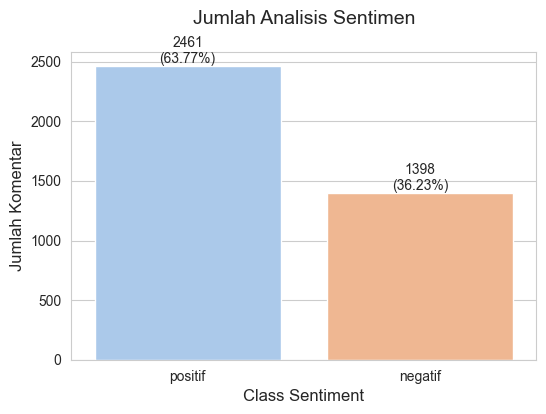

In [11]:
sentiment_count = df['sentimen'].value_counts()
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Komentar', fontsize=12)

total = len(df['sentimen'])

for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()

In [12]:
df.to_csv('sirendy_label.csv', index=False)

# Modelling Version_1
Still Error hehe

In [ ]:
data = pd.read_csv('hasil_labelling_31.csv')
data.info()

In [ ]:
# Ubah kolom sentiment menjadi biner
data["sentiment"] = data["sentiment"].map({"Positif": 1, "Negatif": 0})
data["sentiment"].value_counts()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  TfidfVectorizer

cleaned_data = data.dropna(subset=['stopword'])

X = cleaned_data['stopword']
y = cleaned_data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print('jumlah data latih', len(X_train))
print('jumlah data uji', len(X_test))

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

X_train_vec.shape, X_test_vec.shape

In [ ]:
train_size = len(X_train)
test_size = len(X_test)

plt.figure(figsize=(6, 4))
bars = plt.bar(['Data Training', 'Data Testing'], [train_size, test_size], color=['blue', 'orange'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height} ({height / (train_size + test_size) * 100:.2f}%)',
            ha='center', va='bottom')

plt.title('Jumlah Data Latih dan Data Uji')
plt.xlabel('Jenis Data')
plt.ylabel('Jumlah Data')
plt.show()

# SVM, KNN, NAIVE BAYES, RANDOM FOREST, DESCISSION TREE, NEURAL NETWORK

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D

In [ ]:
# Initialize models
models = {
    "SVM": SVC(kernel='linear', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "Decision Trees": DecisionTreeClassifier(random_state=42),
    "Neural Network": MLPClassifier(random_state=42, hidden_layer_sizes=(100,), max_iter=500),
}

# Train models
results = {}
for model_name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    results[model_name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "classification_report": classification_report(y_test, y_pred, output_dict=True),
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for model_name, result in results.items():
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(
        result["confusion_matrix"],
        annot=True,
        fmt='d',
        cmap="YlGnBu",
        cbar=False,
        xticklabels=['Negatif', 'Positif'],
        yticklabels=['Negatif', 'Positif'],
        ax=ax,
        square=True,
        linewidths=0.5
    )
    print(f"\nConfusion Matrix for {model_name}:")
    ax.set_title(f"{model_name} Confusion Matrix", fontsize=12)
    ax.set_xlabel("Predicted", fontsize=12)
    ax.set_ylabel("Actual", fontsize=12)
    plt.tight_layout()
    plt.show()

In [ ]:
# Urutkan berdasarkan nilai akurasi (dari besar ke kecil)
accuracies = {model: result['accuracy'] for model, result in results.items()}
sorted_accuracies = dict(sorted(accuracies.items(), key=lambda item: item[1], reverse=True))

# Warna terang cerah (bright colors)
bright_colors = [
    'lightskyblue', 'lightcoral', 'palegreen', 'khaki',
    'plum', 'lightsalmon', 'mediumturquoise', 'wheat'
]

# Sesuaikan jumlah warna dengan jumlah model
num_models = len(sorted_accuracies)
colors = bright_colors[:num_models] if num_models <= len(bright_colors) else bright_colors * (num_models // len(bright_colors) + 1)

plt.figure(figsize=(8, 5))

# Buat bar horizontal dengan warna terang
bars = plt.barh(
    list(sorted_accuracies.keys()),
    list(sorted_accuracies.values()),
    color=colors[:num_models]
)

# Tambahkan nilai akurasi di setiap bar
for bar in bars:
    accuracy = bar.get_width()
    plt.text(
        accuracy + 0.01,
        bar.get_y() + bar.get_height() / 2,
        f'{accuracy:.2f} ({accuracy * 100:.1f}%)',
        va='center',
        fontsize=10
    )

plt.title("Perbandingan Akurasi Model")
plt.xlabel("Akurasi")
plt.xlim(0, 2)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
from IPython.display import display

for model_name, result in results.items():
    print(f"\nClassification Report for {model_name}:")

    report_df = pd.DataFrame(result['classification_report']).transpose()

    styled_df = report_df.style.background_gradient(cmap="coolwarm")
    styled_df = styled_df.format(precision=3)
    display(styled_df)